### Importing all the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('./data/bike_sharing.txt')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [21]:
df['hour'] = pd.to_datetime(df['datetime']).dt.hour
df['month'] = pd.to_datetime(df['datetime']).dt.month
df['day'] = pd.to_datetime(df['datetime']).dt.day
df['year'] = pd.to_datetime(df['datetime']).dt.year


In [22]:
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [23]:
df['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [24]:
df['year'].unique()

array([2011, 2012])

In [25]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,day,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1,2011


<Axes: xlabel='month', ylabel='count'>

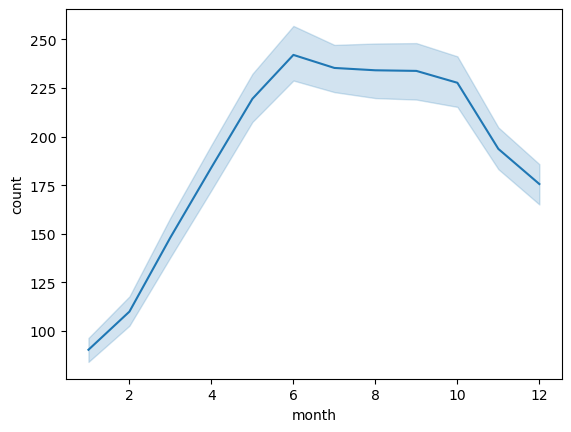

In [26]:
sns.lineplot(x=df['month'], y=df['count'])

<Axes: xlabel='hour', ylabel='count'>

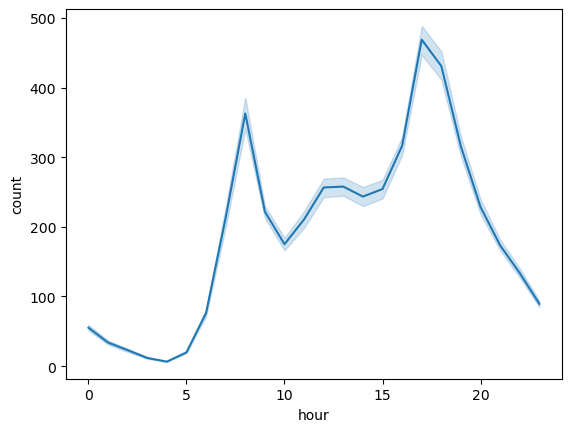

In [28]:
sns.lineplot(x=df['hour'], y=df['count'])

Creating a copy of the original dataframe

In [29]:
df_v1 = df.copy()

In [33]:
df_v1['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

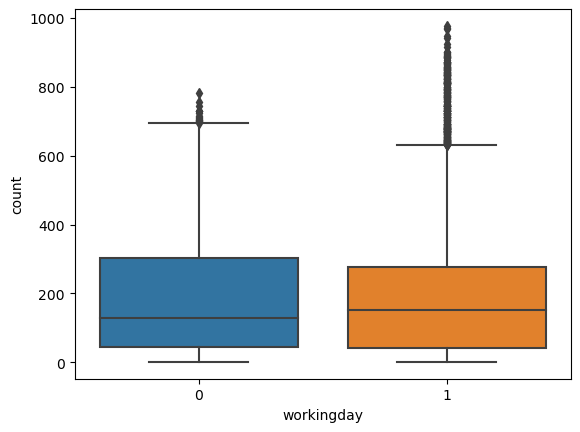

In [34]:
#Lets check if working day has any impact on count or not

sns.boxplot(x=df_v1['workingday'], y=df_v1['count'])
plt.show()

#There seems to be a lot of outliers

In [36]:
Q1 = df_v1['count'].quantile(0.25)
Q3 = df_v1['count'].quantile(0.75)

IQR = Q3 - Q1

df_v1 = df_v1[(df_v1['count'] > (Q1 - 1.5*IQR)) & (df_v1['count'] < (Q3 + 1.5*IQR))] 

### Hypothesis Testing

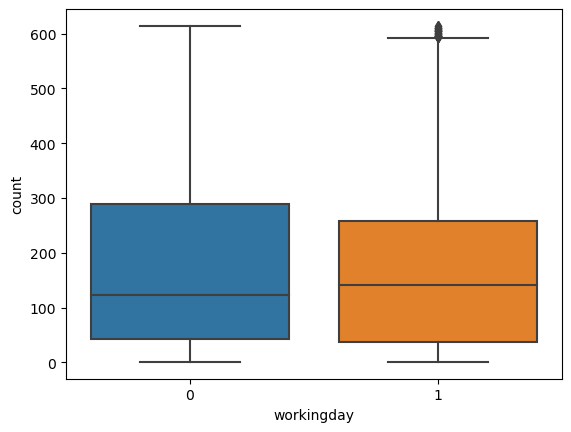

In [37]:
sns.boxplot(x=df_v1['workingday'], y=df_v1['count'])
plt.show()

##### Working Day has effect on number of electric cycles rented?

In [38]:
df_v1['workingday'].value_counts()

1    7110
0    3392
Name: workingday, dtype: int64

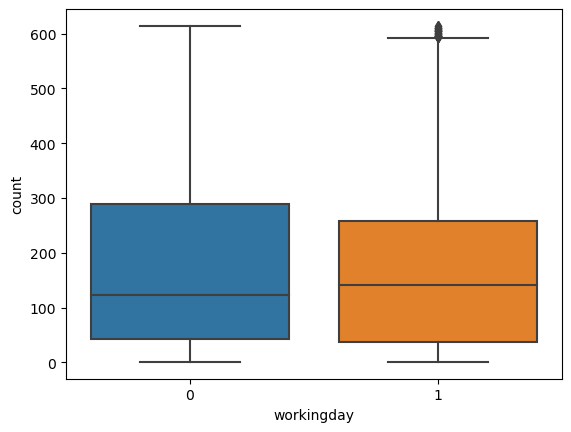

In [40]:
sns.boxplot(x=df_v1['workingday'], y= df_v1['count'])
plt.show()

Defining the Null and Alternate Hypothesis

1. Null Hypothesis: Bike rental count is same for weekday and weekend
2. Alternate Hypothesis: Bike rental count is different for weekday and weekend

In [51]:
weekday = df_v1[df_v1['workingday'] == 1]['count'].sample(3392)
weekend = df_v1[df_v1['workingday'] == 0]['count'].sample(3392)


In [52]:
print(f'Sample standard deviation of weekday: {weekday.std()}')
print(f'Sample standard deviation of weekend: {weekend.std()}')

Sample standard deviation of weekday: 147.90628953127657
Sample standard deviation of weekend: 158.96489670123464


In [53]:
print(f'Sample mean of weekday: {weekday.mean()}')
print(f'Sample mean of weekend: {weekend.mean()}')

Sample mean of weekday: 169.56603773584905
Sample mean of weekend: 177.00353773584905


Since we have two categories and sample size is also > 30, we can go ahead with t-test. Now for this senario it will be one sample test

In [54]:
from scipy.stats import ttest_ind


test_stats, p_value = ttest_ind(weekday, weekend, alternative='greater')

print('Test Statistic: ',test_stats)
print('P value: ',p_value)


Test Statistic:  -1.9949498064459097
P value:  0.9769558489629662


In [57]:
def conclusion(p_value):
    sv = 0.05

    if p_value < sv:
        return 'Null Hypothesis is rejected'
    else:
        return 'Null Hypothesis is accepted'

In [58]:
conclusion(p_value)

'Null Hypothesis is accepted'

-----

#### Question on T-test: 


A company claims that their new product has a mean weight of 100 grams. A sample of 50 products is selected, and the sample mean weight is found to be 98 grams, with a standard deviation of 5 grams. Conduct a hypothesis test with a significance level of 0.05 to determine if there is evidence to suggest that the true mean weight of the product is different from the claimed mean of 100 grams.

In [1]:
pop_mean = 100
sample_size = 50
sample_std = 5
sample_mean = 98

significance_level = 0.05


1. Ho = There is no change in the true mean weight
2. Ha = There is a change in true mean weight

In [3]:
from scipy.stats import ttest_1samp


test_stats = (sample_mean - pop_mean)/(sample_std/(sample_size ** 0.5))

t_statistic, p_value = ttest_1samp((sample_mean - pop_mean) / (sample_std / (sample_size**0.5)), 0)

print(test_stats, p_value)

-2.8284271247461903 nan


Since p-value is less than the significance level, Ho can be rejected

Question: Rice and Wheat

![Alt text](../images/Screenshot%202023-03-16%20at%2010.24.39%20PM.png)

1. Ho = Both rice and wheat are equally popular in the state
2. Ha = Both rice and whaet are not equally popular

In [4]:
n = 1000
x = 540 #Number of rice eaters

p = x/n #sample proportion of rice eaters 

![Alt text](../images/Screenshot%202023-03-16%20at%2010.30.00%20PM.png)

1. Ho: The Hourly wages paid by plant A is same as Plant B
2. Ha: The Hourly wages paid by plant A is not same as plant B 

In [5]:
#Plant A
n1 = 150
x1 = 2.87
s1 = 1.08


#Plant B
n2 = 200
x2 = 2.56
s2 = 1.28


from scipy.stats import ttest_ind_from_stats

t_stats, p_value = ttest_ind_from_stats(x1,s1,n1,x2,s2,n2, alternative='greater')

print('Test Statistics: ', t_stats)
print('p_value: ',p_value)


if p_value < 0.01:
    print('Reject Null Hypothesis')
else:
    print('Accept Null Hypothesis')

Test Statistics:  2.3947738234213953
p_value:  0.008579470194694674
Reject Null Hypothesis
